In [1]:
pip install requests

Baixando e extraindo dados...
Primeiras linhas dos dados:
   DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  30/10/2018   14:42:58         2018                2  ELEIÇÃO ORDINÁRIA   
1  30/10/2018   14:42:58         2018                2  ELEIÇÃO ORDINÁRIA   
2  30/10/2018   14:42:58         2018                2  ELEIÇÃO ORDINÁRIA   
3  30/10/2018   14:42:58         2018                2  ELEIÇÃO ORDINÁRIA   
4  30/10/2018   14:42:58         2018                2  ELEIÇÃO ORDINÁRIA   

   NR_TURNO  CD_ELEICAO                      DS_ELEICAO  DT_ELEICAO  \
0         1         297  ELEIÇÕES GERAIS ESTADUAIS 2018  07/10/2018   
1         1         297  ELEIÇÕES GERAIS ESTADUAIS 2018  07/10/2018   
2         1         297  ELEIÇÕES GERAIS ESTADUAIS 2018  07/10/2018   
3         1         297  ELEIÇÕES GERAIS ESTADUAIS 2018  07/10/2018   
4         1         297  ELEIÇÕES GERAIS ESTADUAIS 2018  07/10/2018   

  TP_ABRANGENCIA  ...  NM_UE CD_MUNICIPIO      NM_MU

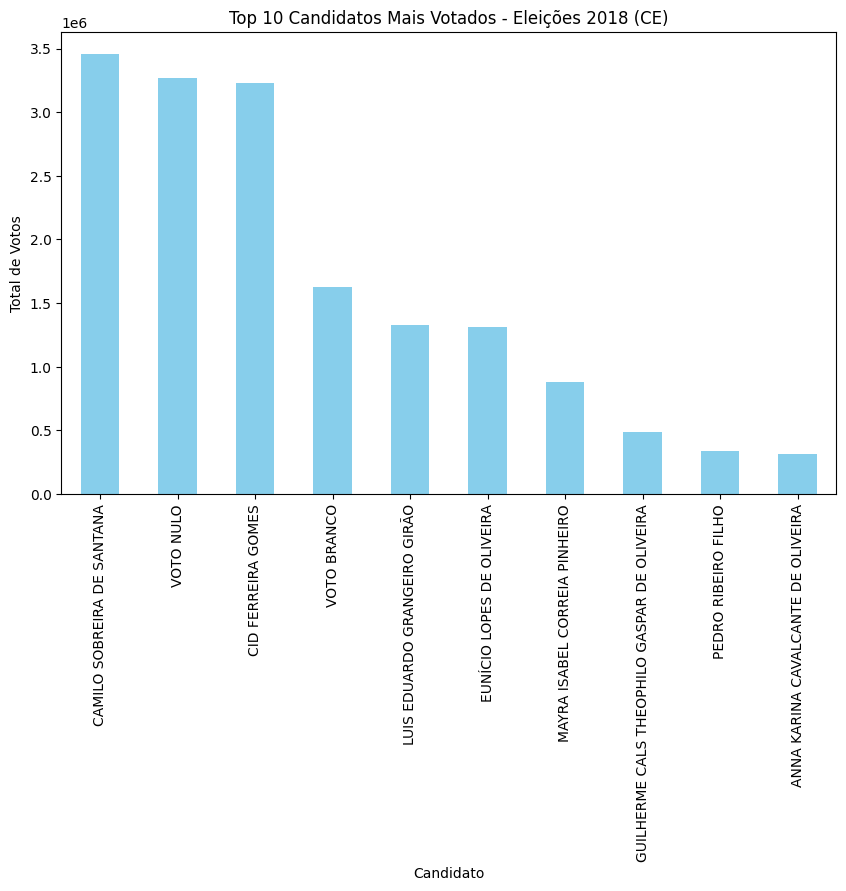

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from zipfile import ZipFile

# Função para baixar e extrair os dados
def baixar_extrair_dados(url):
    response = requests.get(url)
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall("dados_eleicoes_2018")

# Passo 3: Ler os dados
def ler_dados(caminho_arquivo):
    # Ler o arquivo CSV com ponto e vírgula como delimitador e aspas duplas como caractere de escape
    dados = pd.read_csv(caminho_arquivo, delimiter=';', encoding="latin1", quotechar='"')
    return dados

# Passo 4: Realizar análises específicas de eleições de 2018
def analisar_eleicoes_2018(dados):
    # Exibir as primeiras linhas dos dados
    print("Primeiras linhas dos dados:")
    print(dados.head())

    # Resumo estatístico
    print("\nResumo estatístico:")
    print(dados.describe())

    # Análise específica de eleições de 2018
    print("\nAnálise de eleições de 2018:")
    total_votos = dados['QT_VOTOS'].sum()
    print(f"Total de votos: {total_votos}")

    # Candidato mais votado
    candidato_mais_votado = dados.loc[dados['QT_VOTOS'].idxmax()]
    print(f"\nCandidato mais votado:\n{candidato_mais_votado}")

# Passo 5: Gerar visualizações específicas de eleições de 2018
def visualizar_eleicoes_2018(dados):
    # Histograma de votos por candidato
    plt.figure(figsize=(10, 6))
    dados.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().nlargest(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Candidatos Mais Votados - Eleições 2018 (CE)')
    plt.xlabel('Candidato')
    plt.ylabel('Total de Votos')
    plt.show()

# Passo 6: Função principal
def main():
    # URL dos dados eleitorais de 2018 (CE)
    url_dados = "https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2018_CE.zip"

    # Baixar e extrair os dados
    print("Baixando e extraindo dados...")
    baixar_extrair_dados(url_dados)

    # Caminho do arquivo baixado
    caminho_arquivo = "dados_eleicoes_2018/votacao_secao_2018_CE.csv"

    # Ler os dados
    dados = ler_dados(caminho_arquivo)

    # Realizar análises específicas de eleições de 2018
    analisar_eleicoes_2018(dados)

    # Gerar visualizações específicas de eleições de 2018
    visualizar_eleicoes_2018(dados)

if __name__ == "__main__":
    main()